In [1]:
import json

users = set()
groups = set()
edges = list()

with open('data.json') as json_data:
    d = json.load(json_data)
    user = None
    group = None
    for data in d:
        users.add(data)
        for group in d[data]:
            groups.add(group['name'])
            edges.append((data,group['name']))


In [2]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt

B = nx.Graph()
B.add_nodes_from(users , bipartite=0) 
B.add_nodes_from(groups , bipartite=1) 
B.add_edges_from(edges)

#nx.draw(B)
"""
pos=nx.spring_layout(B,iterations=10)
nx.draw(B,pos,node_size=0,alpha=0.4,edge_color='r',font_size=16)
plt.savefig("bipartite.png")
plt.show()
"""

'\npos=nx.spring_layout(B,iterations=10)\nnx.draw(B,pos,node_size=0,alpha=0.4,edge_color=\'r\',font_size=16)\nplt.savefig("bipartite.png")\nplt.show()\n'

C:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


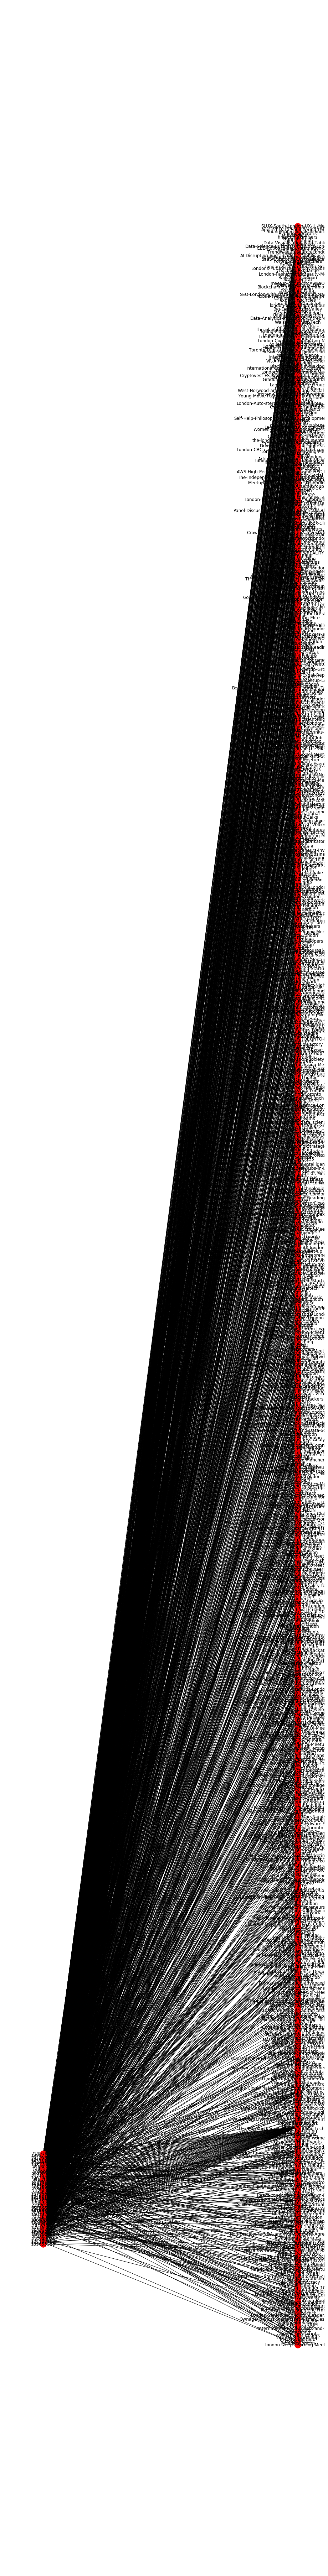

In [15]:

X, Y = bipartite.sets(B)
pos = dict()
pos.update( (n, (1, i+600+(i*10))) for i, n in enumerate(X) ) # put nodes from X at x=1
pos.update( (n, (2, i+(i*40))) for i, n in enumerate(Y) ) # put nodes from Y at x=2
plt.figure(figsize=(12,100))
nx.draw(B, pos=pos, with_labels = True)
plt.show()